In [26]:
from settings import *
import matplotlib.pyplot as plt
import numpy as np

In [27]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

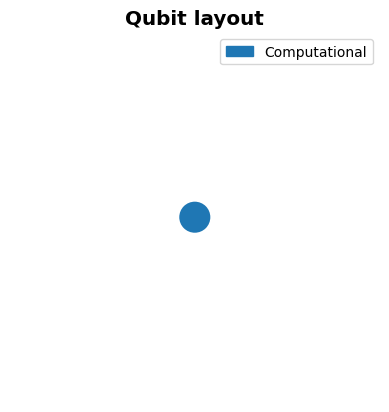

In [28]:
qubits.show_layout()

In [29]:
# theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=100)

# theta_opt = np.save("ham_theta_opt.npy", theta_opt)
# thetas = np.save("ham_thetas.npy", thetas)
# errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=7122
Iteration: 0 
            Current gradient term: [ 7.82226804e-02 -1.46685756e-03  8.74829037e-02  0.00000000e+00
  8.74829037e-02  1.16442243e-02  7.72952213e-02  0.00000000e+00
  7.72952213e-02  7.65492277e-05  8.83011768e-02  0.00000000e+00
  8.83011768e-02  9.97686774e-03  7.65948666e-02  0.00000000e+00
  7.65948666e-02  1.84999339e-03  8.88760853e-02  0.00000000e+00] 
            Current error: 0.30793911844994626 
            Current sigma values: (1, 0, 10)
Iteration: 10 
            Current gradient term: [ 7.54999413e-05  1.68930226e-05 -2.82371843e-07  0.00000000e+00
 -2.82371844e-07 -6.98082340e-05  2.37153594e-05  0.00000000e+00
  2.37153594e-05  2.24960907e-05  6.99320463e-05  0.00000000e+00
  6.99320463e-05 -2.81564124e-05 -5.05914548e-05  0.00000000e+00
 -5.05914548e-05 -7.29870135e-06  7.50870110e-05  0.00000000e+00] 
            Current error: 0.07671198184933846 
            Current sigma values: (2, 0, 1.25)
Iterati

In [30]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [31]:
theta_opt

array([2.27802772, 1.67938648, 2.01911108, 1.5       , 2.01911108,
       2.37905579, 2.03335429, 1.5       , 2.03335429, 1.5855618 ,
       2.27239772, 1.5       , 2.27239772, 2.09194168, 1.88145832,
       1.5       , 1.88145832, 2.03536061, 2.29426738, 1.5       ])

rho_rand_haar: seed=22742


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

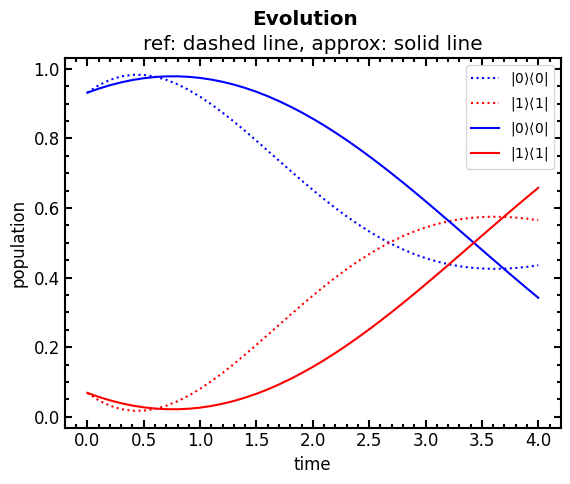

In [32]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_readout_computational_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=40, s=system)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=computation_basis_labels(1))

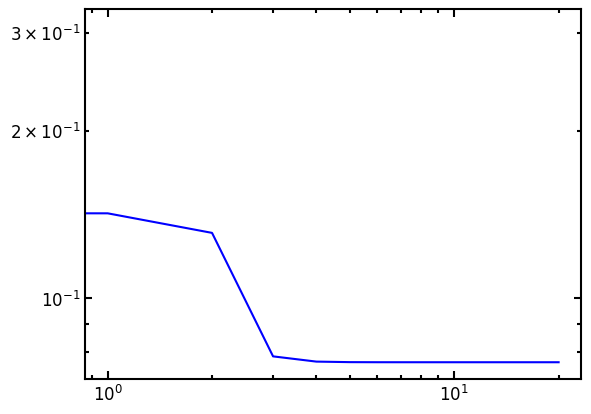

In [33]:
plt.loglog(errors)